           Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.70

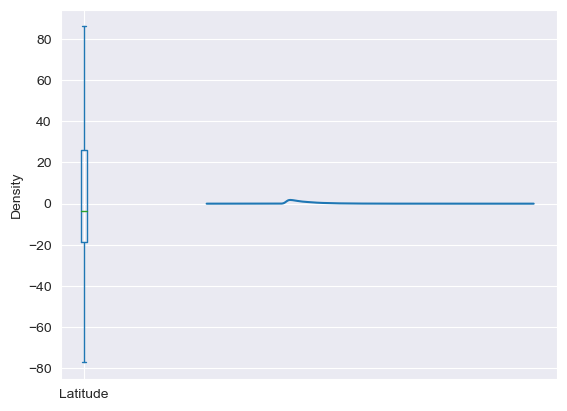

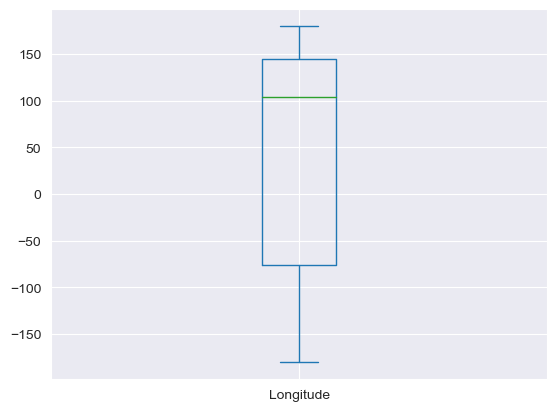

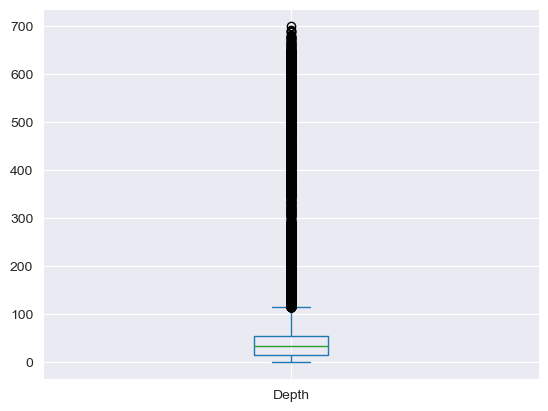

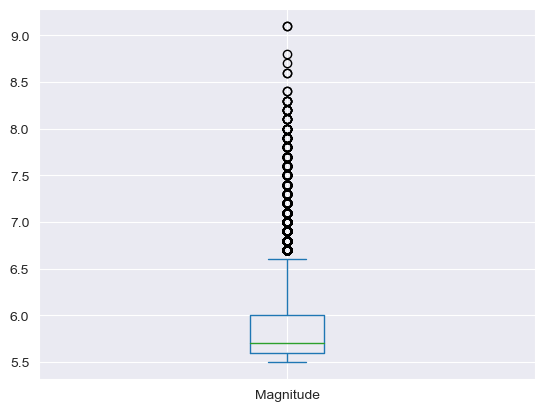

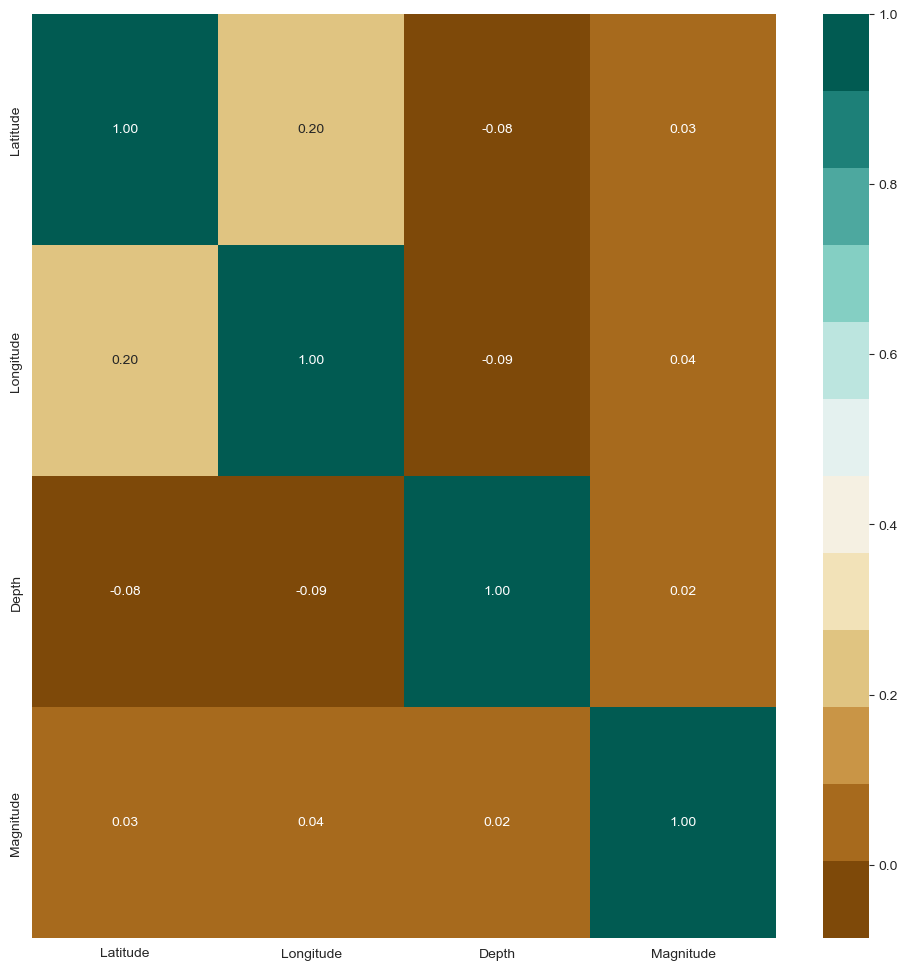

Random Forest (Default): RMSE = 0.4522423903196194, MAE = 0.3319570022777424
Gradient Boosting: RMSE = 0.42258840597006886, MAE = 0.3156997507956259


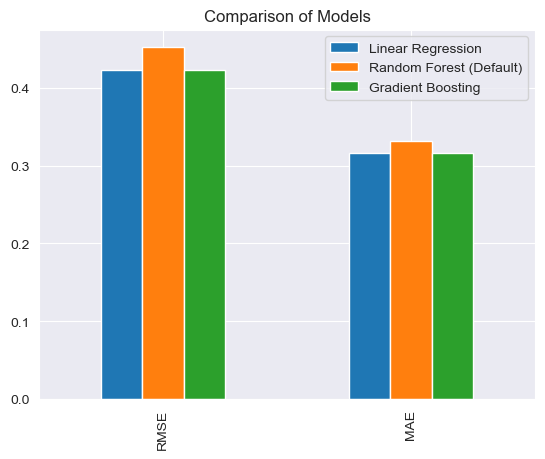

Predicted Magnitude: [5.90342379]


In [22]:
%run -i earthquake_predictor.ipynb

earthquake_predictor = EarthquakePredictor('database.csv')

# Example usage:
earthquake_predictor.display_summary_statistics()
earthquake_predictor.display_info()
earthquake_predictor.check_missing_values()
earthquake_predictor.display_data_distribution()

columns_to_remove = ['Time', 'Type', 'Magnitude Error', 'Date', 'Depth Error', 'Depth Seismic Stations',
                     'Magnitude Type', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
                     'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source',
                     'Status']
earthquake_predictor.remove_not_needed_columns(columns_to_remove)
earthquake_predictor.display_box_plots()
earthquake_predictor.display_correlation_matrix()

# Training models
earthquake_predictor.train_linear_regression()
earthquake_predictor.train_random_forest(n_estimators=100, random_state=0, model_name='Random Forest (Default)')
earthquake_predictor.train_gradient_boosting()

# Comparing models
df_compare_all = earthquake_predictor.compare_models()
df_compare_all.plot(kind='bar', title='Comparison of Models')
plt.show()

# Example prediction
test_data = [[19, 145]]  # Adjust based on the model's expected input format
predicted_magnitude = earthquake_predictor.predict_magnitude(test_data)
print("Predicted Magnitude:", predicted_magnitude)

